In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%pylab inline
import sys
sys.path.insert(0, '/Users/student/Box Sync/marshall-lab')
from cell_twoflag import Cell

Populating the interactive namespace from numpy and matplotlib


In [3]:
path = '/Users/student/Box Sync/marshall-lab/revision/two_flag/'

In [4]:
len_path = path + 'len_2017_10_12/len/'
param_path = path + 'param_fast_2017_10_12/'

In [5]:
len_flist = os.listdir(len_path)
param_list = os.listdir(param_path)

lens = np.zeros(len(len_flist))
# consts = np.zeros(len(len_flist))
# powers = np.zeros(len(len_flist))

In [6]:
# len_flist = os.listdir(len_path)
param_path = path + 'param_fast_2017_10_12/'

param_list = os.listdir(param_path)

params=[]
pred = []
pred2 = []
diffeq = []
len_avg = []
dlist=[]
vel=[] 
# consts = np.zeros(len(len_flist))
# powers = np.zeros(len(len_flist))

for i,fname in enumerate(param_list):
    par = np.loadtxt(param_path+fname)

    params.append(par)
    
    [D, N, dL, d, T, k, v, thresh, L0, L1] = par
    
    Lavg = (L0+L1)*.5
    
    Neff = (N/2-thresh) * (1+(2*D/(Lavg*v)))**-1
    

#     print(N,v,Lavg,Neff)
    
    rhs = 2*Neff*D*k/d*((1+(T*d/(2*Neff*D*k)))**.5 - 1)
    rhs2 = 2*N*D*k/d*((1+(T*d/(2*N*D*k)))**.5 - 1)
    
    lhs = 2*Neff*D*k*(T-L0-L1)/(Lavg**2)
    dlist.append(d)
    diffeq.append(lhs)
    vel.append(v)
    pred.append(rhs)
    pred2.append(rhs2)
    len_avg.append(Lavg)

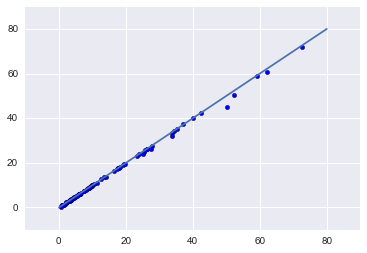

In [7]:
plt.scatter(pred,len_avg)
# [m,b] = np.polyfit(pred,len_avg,1)
plt.plot([0,80],[0,80])

In [8]:
lowV = []
lowVL = []
for fname in os.listdir('/Volumes/secretfilesfromthepentagon/qb3cluster/ve/revisions/two_flag/param/'):
    if len(np.loadtxt('/Volumes/secretfilesfromthepentagon/qb3cluster/ve/revisions/two_flag/param/'+fname)) == 10:

        [D, N, dL, d, T, k, v, thresh, L0, L1] = np.loadtxt('/Volumes/secretfilesfromthepentagon/qb3cluster/ve/revisions/two_flag/param/'+fname)


        L=(L0+L1)/2
        NeffV = (N/2-thresh) * (1+(2*D/(Lavg*v)))**-1

        rhs = 2*NeffV*D*k/d*((1+(T*d/(2*NeffV*D*k)))**.5 - 1)
        lowV.append(rhs)
        lowVL.append(L)


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/secretfilesfromthepentagon/qb3cluster/ve/revisions/two_flag/param/'

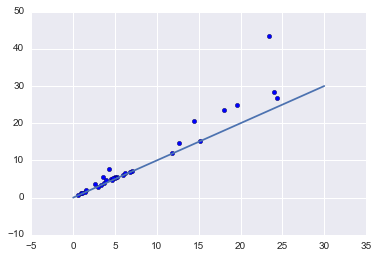

In [17]:
plt.scatter(lowV,lowVL)
plt.plot([0,30],[0,30])

In [18]:
def longzero():

    lz = Cell(t=50000)
#     lz.extend(30000)

    lz.tubulin -= lz.L1
    lz.L1 = 0
    while lz.tubulin < 30:
        lz.tubulin += .1
        lz.extend(500)
    lz.extend(70000)
    return lz.L0_trace, lz.L1_trace

In [30]:
lz0,lz1=longzero()

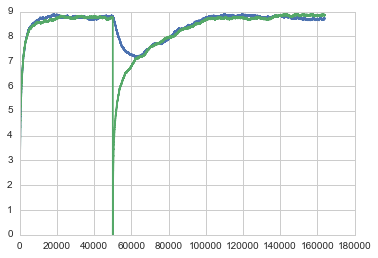

In [31]:
plt.plot(lz0)
plt.plot(lz1)

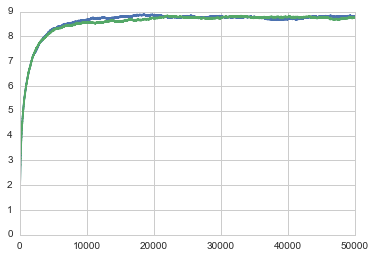

In [32]:
plt.plot(lz0[0:49999])
plt.plot(lz1[0:49999])

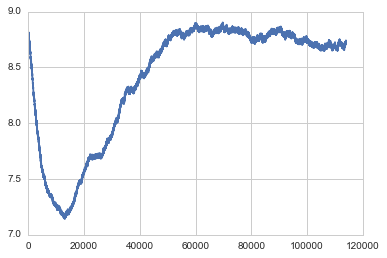

In [33]:
plt.plot(lz0[50000:])

In [34]:
# fig=plt.figure(1, figsize=(12,12));

# sns.set_style("whitegrid",rc={'font.sans-serif':u'Arial'})

# labelsize=20
# plt.subplot(221)
# plt.title('A',fontsize=labelsize,loc='left',fontweight='bold')
# plt.plot(np.linspace(0,49999*.1/60,49999),lz0[0:49999])
# plt.xlabel('time (min)',fontsize=13)
# plt.ylabel(r'Steady-state flagellar length ($\mu m$)',fontsize=13)
# plt.xlim([0,80])
# plt.ylim([0,10])

# plt.subplot(222)
# plt.plot(np.linspace(0,49999*.1/60,49999),lz1[0:49999],'g')
# plt.xlabel('time (min)',fontsize=13)
# plt.ylabel(r'Steady-state flagellar length ($\mu m$)',fontsize=13)
# plt.xlim([0,80])
# plt.ylim([0,10])

# plt.subplot(223)
# lz_duration=len(lz0[50000:])
# plt.plot(np.linspace(0,lz_duration*.1/60,lz_duration),lz0[50000:])
# plt.plot(np.linspace(0,lz_duration*.1/60,lz_duration),lz1[50000:])
# plt.xlabel('time after cut (min)',fontsize=13)
# plt.ylabel(r'Steady-state flagellar length ($\mu m$)',fontsize=13)
# plt.ylim([0,10])
# plt.xlim([0,180])

# plt.subplot(224)
# plt.scatter(pred,len_avg)
# plt.plot([0,80],[0,80],label='asdf')
# plt.xlim([0,80])
# plt.ylim([0,80])
# plt.xlabel('predicted length (um)',fontsize=13)
# plt.ylabel(r'Steady-state average flagellar length ($\mu m$)',fontsize=13)
# legend=plt.legend(frameon=True,loc=4,labelspacing=1)
# frame = legend.get_frame()
# frame.set_edgecolor('black')


In [40]:
np.savetxt('/Users/student/Box Sync/marshall-lab/revision/figures/lz1.txt',lz1)
np.savetxt('/Users/student/Box Sync/marshall-lab/revision/figures/lz0.txt',lz0)

In [9]:
lz0=np.loadtxt('/Users/student/Box Sync/marshall-lab/revision/figures/lz0.txt')
lz1=np.loadtxt('/Users/student/Box Sync/marshall-lab/revision/figures/lz1.txt')

/Users/student/miniconda3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


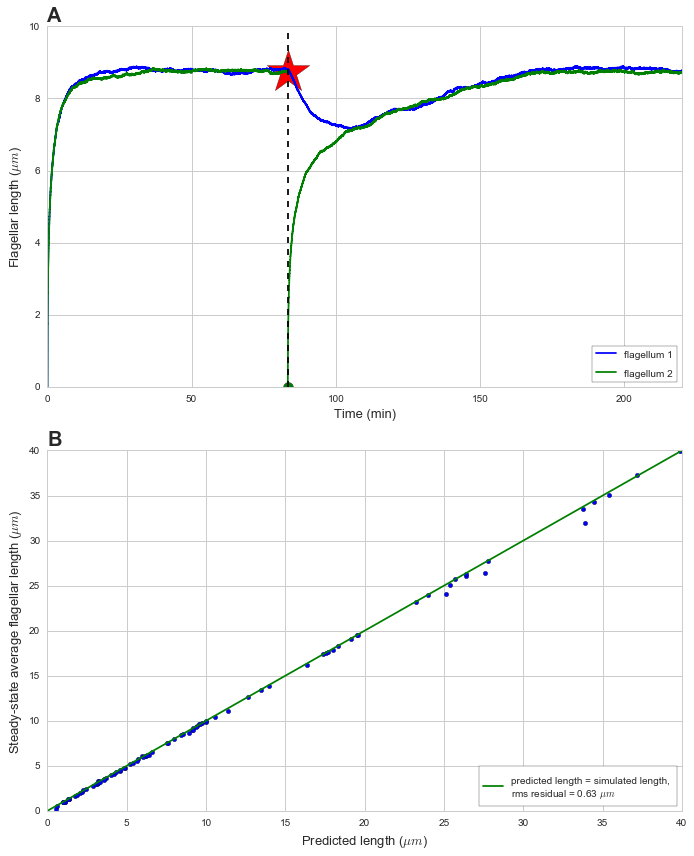

In [14]:
fig=plt.figure(1, figsize=(9.75,12),tight_layout=True);

sns.set_style("whitegrid",rc={'font.sans-serif':u'Arial'})

labelsize=20
plt.subplot(211)
plt.title('A',fontsize=labelsize,loc='left',fontweight='bold')
plt.plot(np.linspace(0,len(lz0)*.1/60,len(lz0)),lz0,c='b',label='flagellum 1')
# plt.xlabel('time (min)',fontsize=13)
# plt.ylabel(r'simulated flagellar length ($\mu m$)',fontsize=13)
# plt.xlim([0,260])
# plt.ylim([0,10])


plt.plot(np.linspace(0,len(lz1[:49999])*.1/60,len(lz1[:49999])),lz1[:49999],'g',label='flagellum 2')
plt.plot(np.linspace(49999*.1/60,len(lz1)*.1/60,len(lz1[49999:])),lz1[49999:],'g')
plt.xlabel('Time (min)',fontsize=13)
plt.ylabel(r'Flagellar length ($\mu m$)',fontsize=13)
plt.scatter(49998*.1/60,lz1[49998],s=2000,marker='*',c='r')
plt.scatter(49999*.1/60,lz1[49999],s=100,c='g',marker='o')
plt.plot([49999*.1/60,49999*.1/60],[0,10],'k--')
plt.xlim([0,220])
plt.ylim([0,10])
legend=plt.legend(frameon=True,loc=4,labelspacing=1)
frame = legend.get_frame()
frame.set_edgecolor('black')

# plt.subplot(223)
# lz_duration=len(lz0[50000:])
# plt.plot(np.linspace(0,lz_duration*.1/60,lz_duration),lz0[50000:])
# plt.plot(np.linspace(0,lz_duration*.1/60,lz_duration),lz1[50000:])
# plt.xlabel('time after cut (min)',fontsize=13)
# plt.ylabel(r'simulated flagellar length ($\mu m$)',fontsize=13)
# plt.ylim([0,10])
# plt.xlim([0,180])

plt.subplot(212)
plt.title('B',fontsize=labelsize,loc='left',fontweight='bold')
plt.scatter(pred,len_avg)
plt.plot([0,80],[0,80],
         label='\npredicted length = simulated length, \nrms residual = %s $\mu m$'%round(np.mean((np.array(len_avg)-np.array(pred))**2)**.5,2),c='g')
plt.xlim([0,40])
plt.ylim([0,40])
plt.xlabel('Predicted length ($\mu m$)',fontsize=13)
plt.ylabel(r'Steady-state average flagellar length ($\mu m$)',fontsize=13)

legend=plt.legend(frameon=True,loc=4,labelspacing=1)
frame = legend.get_frame()
frame.set_edgecolor('black')

# plt.savefig('/Users/student/Box Sync/marshall-lab/revision/figures/fig06_twoflag.png')
plt.savefig('/Users/student/Box Sync/marshall-lab/revision/figures/final_version/Figure 6.png', format='png', dpi=1200)


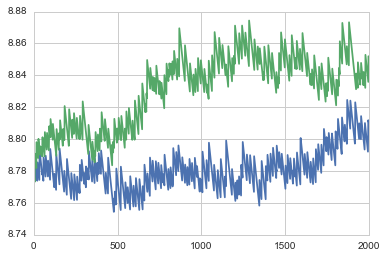

In [47]:
plt.plot(lz0[-2000:])
plt.plot(lz1[-2000:])